# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [54]:
db_baverage = pd.read_csv('Dataset_clustering.csv', nrows=10000)

In [55]:
db_baverage.sample(7)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
7065,ORD2378,CUS5233,B2C,Mezzo Mix,Soft Drinks,0.59,4,0.00,2.36,Rheinland-Pfalz,2021-01-06
3728,ORD1269,CUS2450,B2C,Rauch Multivitamin,Juices,2.31,11,0.00,25.41,Saarland,2021-08-24
1918,ORD639,CUS8169,B2B,Rotkäppchen Sekt,Alcoholic Beverages,7.56,53,0.05,380.65,Berlin,2023-05-05
5146,ORD1735,CUS549,B2B,Mango Juice,Juices,3.96,94,0.15,316.40,Hessen,2023-04-30
974,ORD324,CUS531,B2C,Selters,Water,0.47,10,0.00,4.70,Hessen,2022-04-17
401,ORD139,CUS7240,B2C,Krombacher,Alcoholic Beverages,1.63,4,0.00,6.52,Bayern,2023-01-12
7524,ORD2533,CUS4439,B2C,Fanta,Soft Drinks,1.16,9,0.00,10.44,Bremen,2021-07-18


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [56]:
db_baverage.shape

(10000, 11)

terdapat **8999910 baris dan 11 kolom**

In [57]:
db_baverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


dari 11 kolom, 3 kolom bertipe data float, 1 bertipe integer dan 7 bertipe object

In [58]:
db_baverage.describe(include='all')

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,10000,10000,10000,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000,10000
unique,3358,2875,2,47,4,NaN,NaN,NaN,NaN,16,1043
top,ORD1,CUS8484,B2C,Granini Apple,Soft Drinks,NaN,NaN,NaN,NaN,Hamburg,2023-04-13
freq,5,15,6507,396,2556,NaN,NaN,NaN,NaN,756,32
mean,NaN,NaN,NaN,NaN,NaN,5.766586,23.06040,0.029065,126.547736,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.721471,26.86648,0.044477,496.777802,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.320000,1.00000,0.000000,0.390000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.070000,6.00000,0.000000,8.640000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.800000,11.00000,0.000000,21.130000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.210000,29.00000,0.050000,68.322500,NaN,NaN



---

### **1. Order_ID dan Customer_ID**
- **Jumlah entri (count):** 8.999.910 baris.
- **Unique Order_ID:** 3 juta → berarti satu pesanan bisa muncul beberapa kali, kemungkinan karena terdiri dari beberapa item per pesanan.
- **Unique Customer_ID:** hanya 10.000 → banyak pelanggan melakukan pembelian berulang.
- **Customer terbanyak (top):** `CUS4693` dengan **1.120** transaksi.
  

---

### **2. Customer_Type**
- Hanya ada **2 kategori**: kemungkinan besar ini adalah **B2C** dan **B2B**.
- Tipe pelanggan terbanyak: **B2C**, sebanyak **5.795.405** transaksi (**64,4%** dari total data).

---

### **3. Product**
- Jumlah produk unik: **47 produk**.
- Produk paling populer: **"Hohes C Orange"**, dibeli sebanyak **337.114 kali**.


---

### **4. Category**
- Terdapat **4 kategori utama**.
- Kategori paling dominan: **Alcoholic Beverages** (2.251.625 transaksi).

---

### **5. Unit_Price (Harga per Unit)**
- **Rata-rata harga:** €5,82
- **Harga tertinggi:** €169,53
- **Harga terendah:** €0,32
- **Median (50% data):** €1,75


---

### **6. Quantity (Jumlah Unit per Transaksi)**
- Rata-rata: 23 unit
- Median: 11 unit
- Maksimum: 100 unit

---

### **7. Discount (Diskon)**
- Rata-rata diskon: **2,97%**
- Diskon maksimum: **15%**
- Sebagian besar transaksi tidak memiliki diskon (median dan 25% = 0).

---

### **8. Total_Price (Total Harga per Baris Transaksi)**
- Rata-rata total transaksi: €130,74
- Transaksi terbesar: €14.295,30


---

### **9. Region**
- Terdapat **16 wilayah/region**.
- Wilayah dengan transaksi terbanyak: **Hamburg** (604.054 transaksi).

---

### **10. Order_Date**
- Rentang tanggal: mencakup **1.094 hari (~3 tahun)**
- Tanggal dengan transaksi terbanyak: **2023-06-22** (8.749 transaksi)

---



In [59]:
db_baverage.duplicated().sum()

0

In [60]:
db_baverage.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

tidak terdapat baris duplikat atau kosong

In [61]:
baverage_numeric = db_baverage.select_dtypes(include=[np.number])
baverage_numeric.columns

Index(['Unit_Price', 'Quantity', 'Discount', 'Total_Price'], dtype='object')

In [62]:
baverage_categorical = db_baverage.select_dtypes(include=[object])
baverage_categorical.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Region', 'Order_Date'],
      dtype='object')

In [63]:
print(len(baverage_categorical.columns))
print(len(baverage_numeric.columns))

7
4


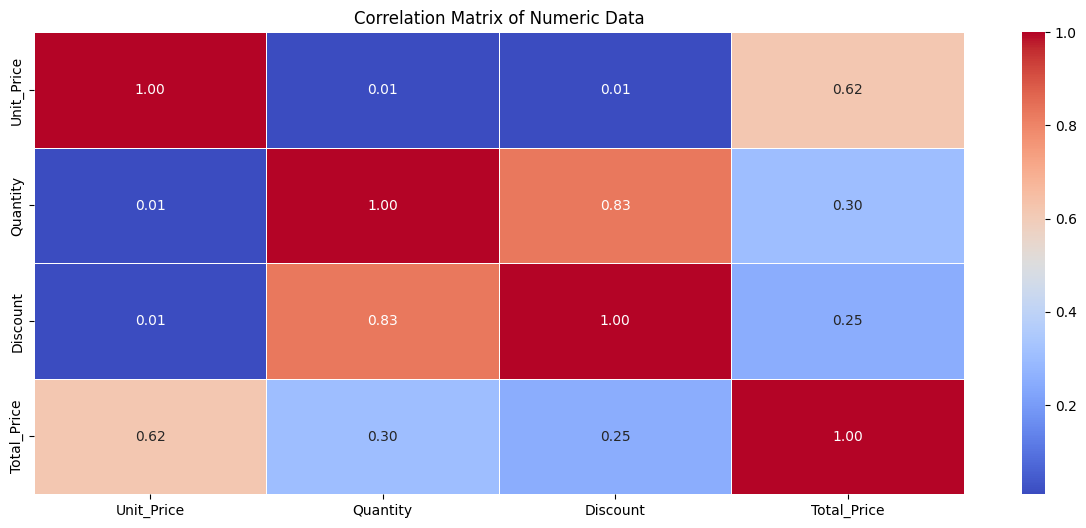

In [64]:

correlation_matrix = baverage_numeric.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Data')
plt.show()


---

### **1. Unit_Price vs Total_Price: 0.62**
- **Interpretasi:** Korelasi **positif sedang-kuat**.
- Artinya, semakin tinggi harga per unit, cenderung semakin tinggi juga total harga transaksi. Ini masuk akal karena `Total_Price` = `Unit_Price × Quantity × (1 - Discount)`.

---

### **2. Quantity vs Discount: 0.82**
- **Interpretasi:** Korelasi **positif sangat kuat**.
- Semakin banyak unit yang dibeli, semakin besar kemungkinan mendapatkan diskon.
  
---

### **3. Quantity vs Total_Price: 0.31**
- Korelasi **positif lemah hingga sedang**.
- Meski jumlah barang berkontribusi pada total harga, mungkin efeknya diimbangi oleh diskon besar atau harga per unit rendah.

---

### **Discount vs Total_Price: 0.25**
- Korelasi **positif lemah**.
- Walau diskon menurunkan nilai per transaksi, korelasinya justru positif. Ini bisa jadi karena diskon diberikan pada pembelian besar (sehingga Total_Price tetap tinggi meskipun didiskon).

---

### **Unit_Price vs Quantity / Discount: ~0**
- Korelasi sangat **lemah/tidak signifikan**.
- Harga per unit tampaknya tidak memengaruhi jumlah barang yang dibeli atau besaran diskon.

---


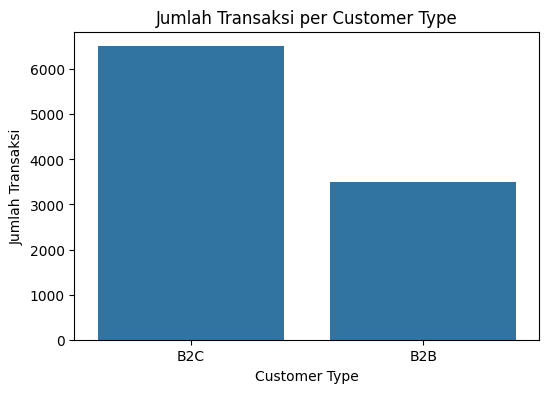

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(data=db_baverage, x='Customer_Type', order=db_baverage['Customer_Type'].value_counts().index)
plt.title('Jumlah Transaksi per Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Jumlah Transaksi')
plt.show()

B2C memiliki jumlah transaksi yang jauh lebih tinggi, sekitar 5,8 juta.

B2B memiliki transaksi lebih sedikit, sekitar 3,2 juta.

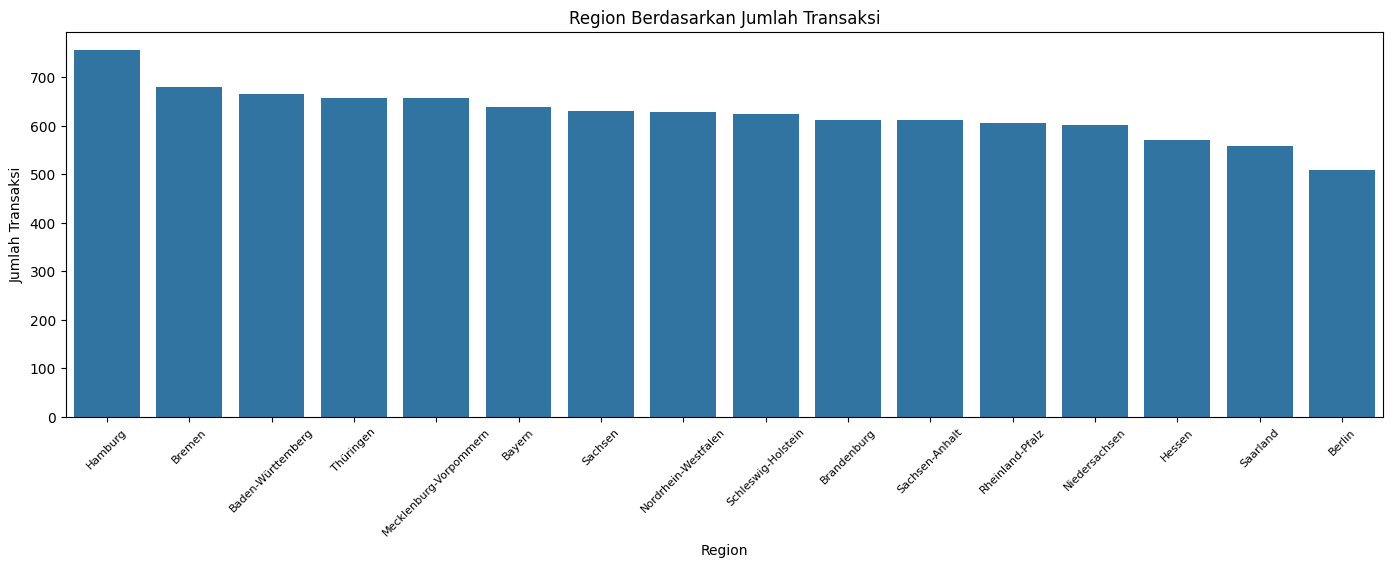

In [66]:
plt.figure(figsize=(17, 5))
top_regions = db_baverage['Region'].value_counts()
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Region Berdasarkan Jumlah Transaksi')
plt.xlabel('Region')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, size=8)
plt.show()

In [67]:
len(db_baverage['Region'].unique())

16

In [68]:
len(db_baverage['Unit_Price'].unique())

914

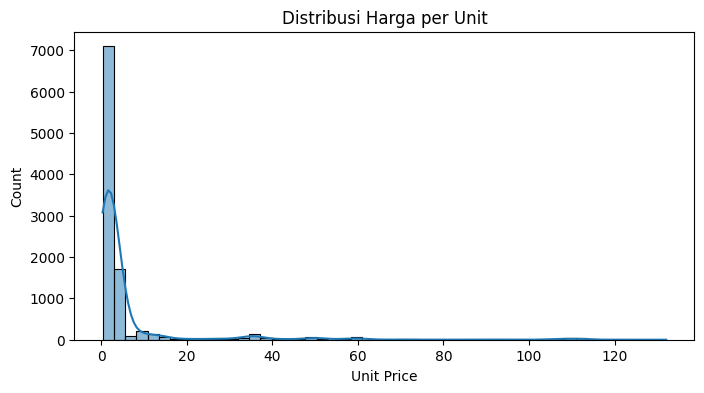

In [69]:

plt.figure(figsize=(8, 4))
sns.histplot(db_baverage['Unit_Price'], bins=50, kde=True)
plt.title('Distribusi Harga per Unit')
plt.xlabel('Unit Price')
plt.show()

**Distribusi Positif Skew (Right-Skewed):**

1. Sebagian besar transaksi terjadi pada rentang harga yang sangat rendah (sekitar 0–5).

2. Semakin tinggi harga, semakin sedikit jumlah transaksi.

`Artinya, mayoritas produk yang terjual memiliki harga murah, sedangkan produk mahal hanya menyumbang jumlah transaksi kecil.`

**Konsentrasi Tinggi pada Harga Rendah:**

1. Lonjakan signifikan pada harga < 5 menandakan produk massal atau kebutuhan sehari-hari dengan harga terjangkau.


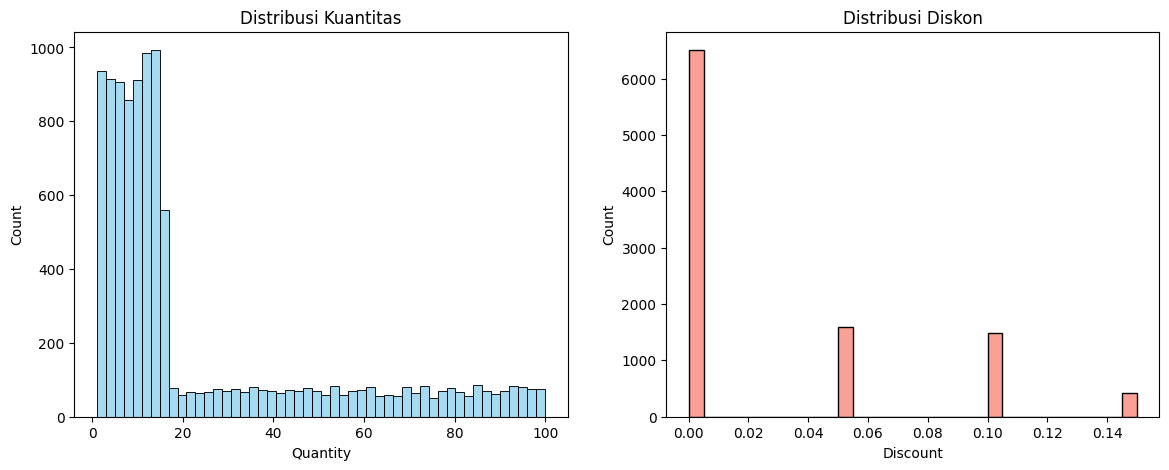

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(db_baverage['Quantity'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Distribusi Kuantitas')

sns.histplot(db_baverage['Discount'], bins=30, ax=ax[1], color='salmon')
ax[1].set_title('Distribusi Diskon')
plt.show()

**Insight:**
- Mayoritas transaksi terjadi pada kuantitas rendah, khususnya antara 1–20 unit, dengan puncaknya di bawah 10 unit.

- Jumlah transaksi menurun drastis setelah kuantitas >20.

- Distribusinya juga right-skewed: artinya sebagian besar pembelian adalah dalam jumlah kecil.

**Implikasi:**
- Menandakan bahwa pembelian eceran atau volume kecil mendominasi.

- Konsumen mungkin membeli untuk konsumsi pribadi (B2C), bukan untuk stok besar.

- Untuk perusahaan, strategi penjualan bisa fokus pada upselling atau bundling agar meningkatkan jumlah unit per transaksi.

---

**Insight:**
- Sebagian besar transaksi tidak mendapatkan diskon (diskon = 0.00), terlihat dari lonjakan ekstrem di titik nol.

- Hanya sebagian kecil transaksi yang mendapatkan diskon, umumnya pada level diskon 5%, 10%, dan 15%.

- Distribusi diskon sangat sparse (jarang dan terpisah).

**Implikasi:**
- Strategi diskon sangat selektif, dan kemungkinan hanya berlaku untuk segmen khusus (misalnya B2B, loyal customers, atau pembelian besar).

- Potensi untuk eksperimen diskon guna mengukur efek terhadap volume penjualan, terutama di produk dengan margin tinggi.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11112\4146947922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_harga.values, y=top10_harga.index, palette='viridis')


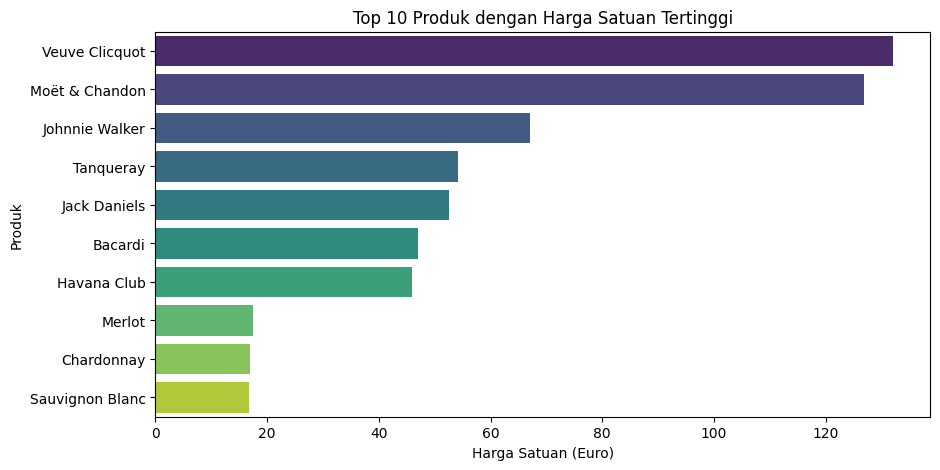

In [71]:
top10_harga = (
    db_baverage.groupby('Product')['Unit_Price']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10_harga.values, y=top10_harga.index, palette='viridis')
plt.title('Top 10 Produk dengan Harga Satuan Tertinggi')
plt.xlabel('Harga Satuan (Euro)')
plt.ylabel('Produk')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11112\371180232.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_premium_products.values, y=revenue_premium_products.index, palette='mako')


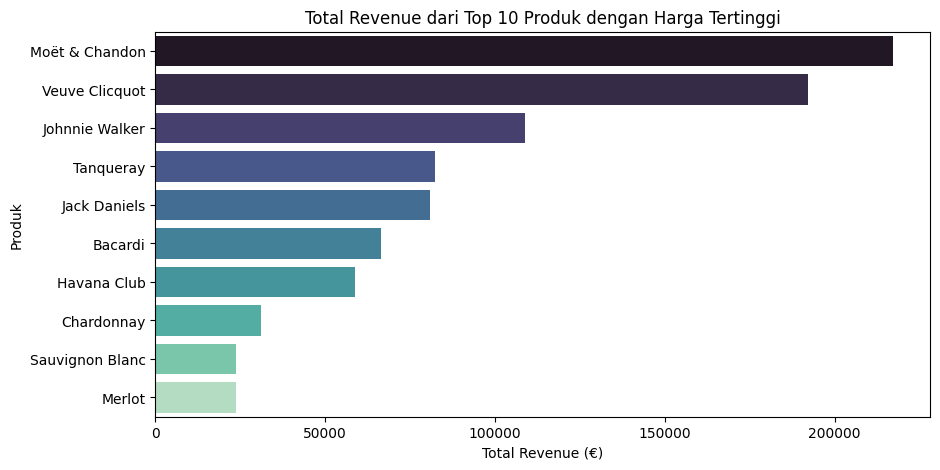

In [72]:
top10_premium_products = (
    db_baverage.groupby('Product')['Unit_Price']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)

premium_df = db_baverage[db_baverage['Product'].isin(top10_premium_products)]


revenue_premium_products = (
    premium_df.groupby('Product')['Total_Price']
    .sum()
    .sort_values(ascending=False)
)


plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_premium_products.values, y=revenue_premium_products.index, palette='mako')
plt.title('Total Revenue dari Top 10 Produk dengan Harga Tertinggi')
plt.xlabel('Total Revenue (€)')
plt.ylabel('Produk')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11112\441744055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_discount_max.values, y=top_discount_max.index, palette='rocket')


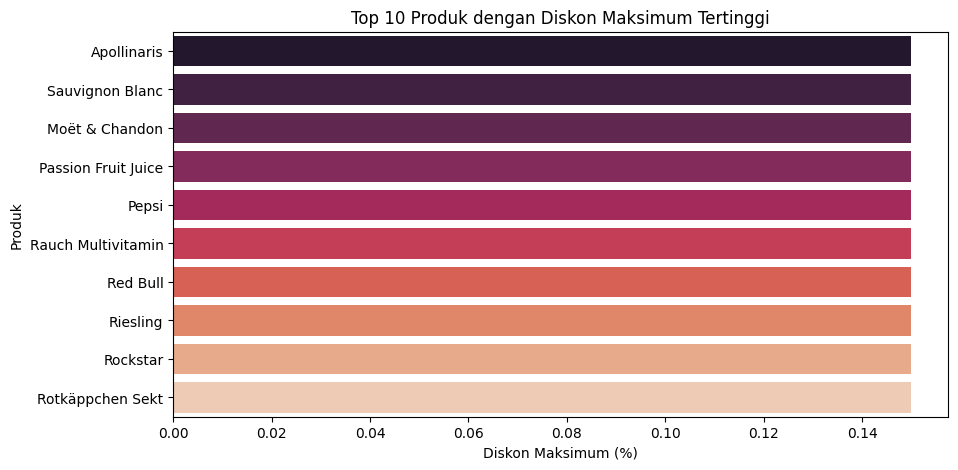

In [73]:
# Top 10 produk dengan diskon maksimum tertinggi
top_discount_max = (
    db_baverage.groupby('Product')['Discount']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_discount_max.values, y=top_discount_max.index, palette='rocket')
plt.title('Top 10 Produk dengan Diskon Maksimum Tertinggi')
plt.xlabel('Diskon Maksimum (%)')
plt.ylabel('Produk')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11112\347652121.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')


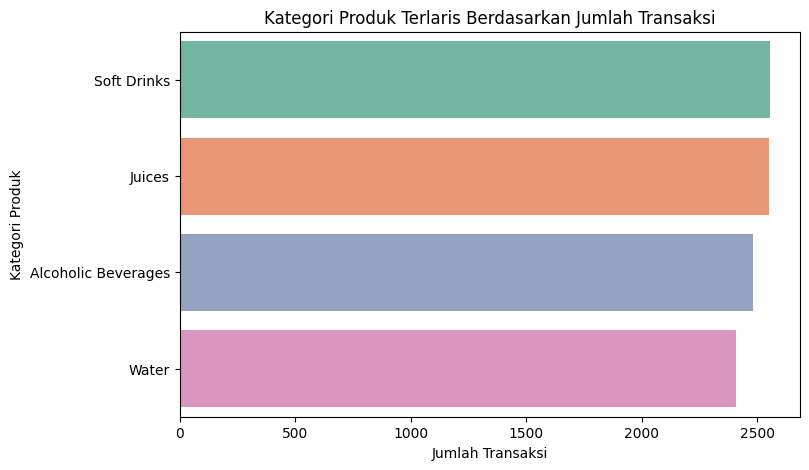

In [74]:
# Hitung jumlah transaksi per kategori
top_categories = (
    db_baverage['Category']
    .value_counts()
    .sort_values(ascending=False)
)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.title('Kategori Produk Terlaris Berdasarkan Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Produk')
plt.show()


In [75]:
db_baverage['Category'].unique()

array(['Water', 'Soft Drinks', 'Juices', 'Alcoholic Beverages'],
      dtype=object)

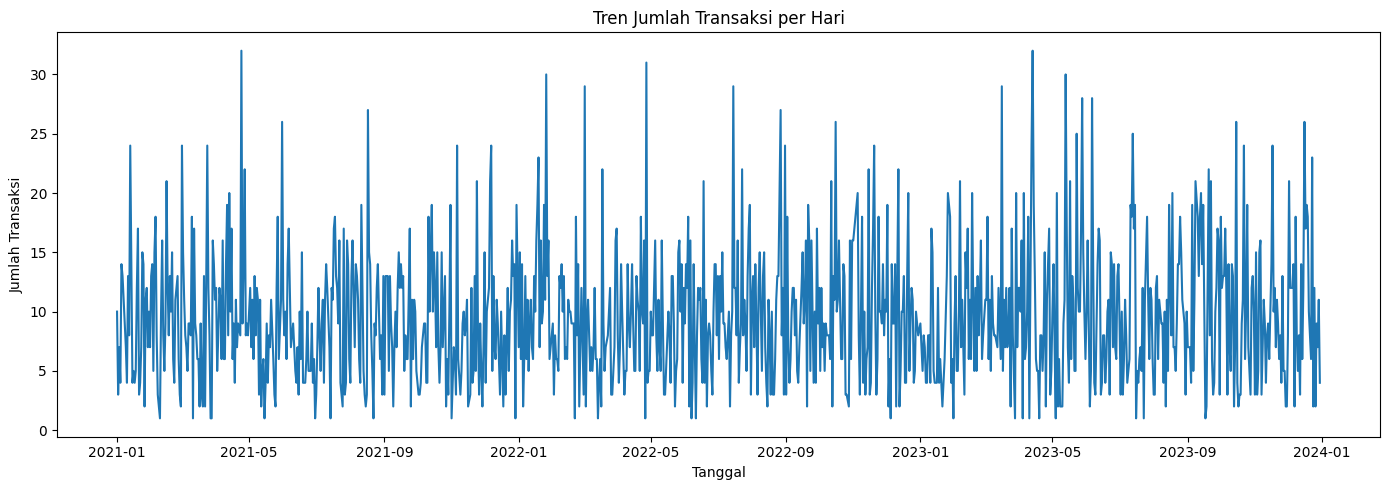

In [76]:
db_baverage['Order_Date'] = pd.to_datetime(db_baverage['Order_Date'])

transaksi_per_hari = (
    db_baverage.groupby('Order_Date')
    .size()
    .reset_index(name='Jumlah_Transaksi')
)

plt.figure(figsize=(14, 5))
sns.lineplot(data=transaksi_per_hari, x='Order_Date', y='Jumlah_Transaksi')
plt.title('Tren Jumlah Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()


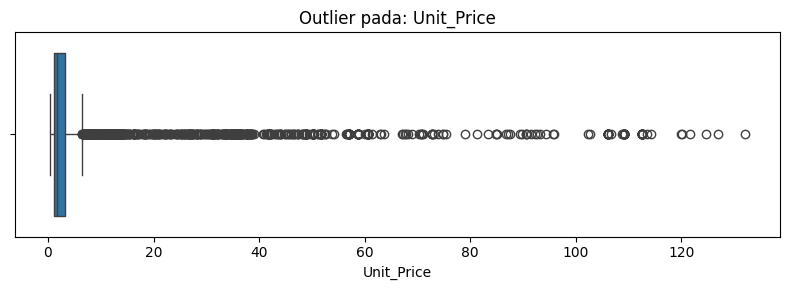

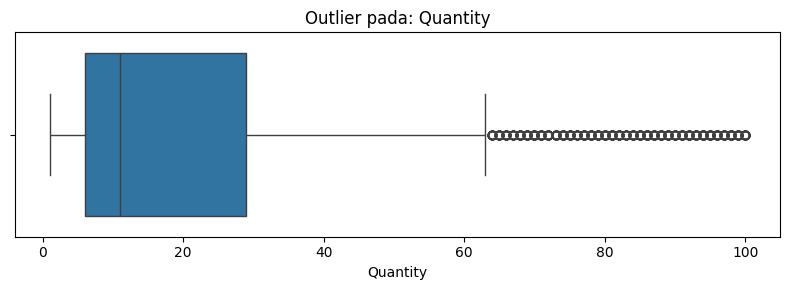

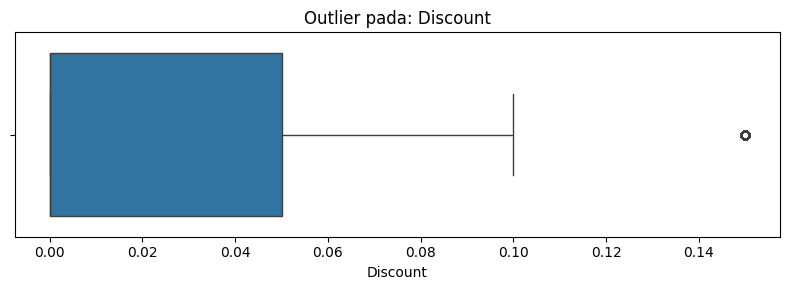

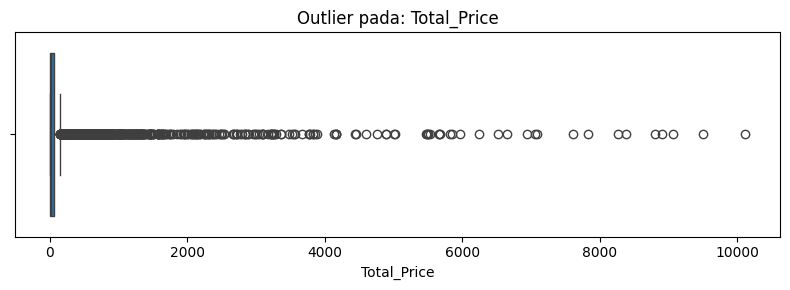

In [77]:
# Boxplot untuk masing-masing kolom secara terpisah
for col in baverage_numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=baverage_numeric[col])
    plt.title(f'Outlier pada: {col}')
    plt.tight_layout()
    plt.show()


### **Kesimpulan Analisis Outlier:**

- **Outlier memang terdeteksi secara statistik** pada variabel `Unit_Price`, `Quantity`, `Discount`, dan `Total_Price`.
- Namun, **tidak semuanya merupakan error** atau data yang harus dihapus.
- Banyak outlier justru **masih relevan secara konteks bisnis**, terutama pada transaksi B2B, produk premium, atau pembelian dalam jumlah besar.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [78]:
b2c_data = db_baverage[db_baverage['Customer_Type'] == 'B2C']
b2b_data = db_baverage[db_baverage['Customer_Type'] == 'B2B']

b2c_sampled = b2c_data.sample(n=len(b2b_data), random_state=42)

db_baverage = pd.concat([b2c_sampled, b2b_data], axis=0).reset_index(drop=True)


print(db_baverage['Customer_Type'].value_counts())


Customer_Type
B2C    3493
B2B    3493
Name: count, dtype: int64


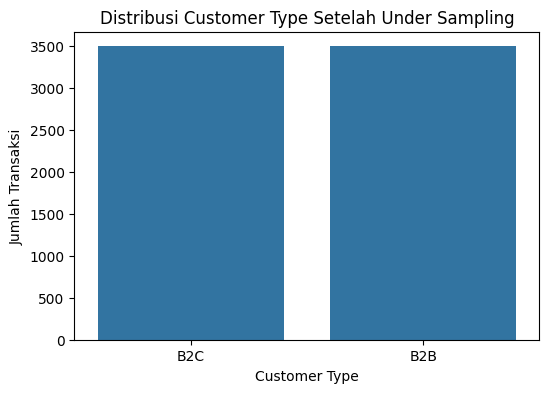

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(data=db_baverage, x='Customer_Type')
plt.title('Distribusi Customer Type Setelah Under Sampling')
plt.xlabel('Customer Type')
plt.ylabel('Jumlah Transaksi')
plt.show()


- Terjadi proses under sampling terhadap kelas mayoritas (B2C) agar seimbang dengan kelas minoritas (B2B).

- Sekarang kedua kelas memiliki jumlah transaksi yang hampir sama, sekitar 3,2 juta.

In [80]:
baverage_numeric['Unit_Price_log'] = np.log1p(baverage_numeric['Unit_Price'])
baverage_numeric['Total_Price_log'] = np.log1p(baverage_numeric['Total_Price'])

In [81]:
baverage_numeric['Quantity_sqrt'] = np.sqrt(baverage_numeric['Quantity'])


In [82]:
scaler = MinMaxScaler()
baverage_numeric['Discount_scaled'] = scaler.fit_transform(baverage_numeric[['Discount']])

In [83]:
db_baverage['Discount_scaled'] = baverage_numeric['Discount_scaled']


In [84]:
db_baverage.sample(7)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Discount_scaled
4753,ORD1254,CUS7479,B2B,Volvic Touch,Water,0.53,32,0.05,16.11,Niedersachsen,2021-12-12,0.666667
5158,ORD1651,CUS7366,B2B,Fanta,Soft Drinks,1.32,99,0.10,117.61,Rheinland-Pfalz,2023-02-02,0.000000
5143,ORD1642,CUS9123,B2B,Pepsi,Soft Drinks,1.68,8,0.05,12.77,Thüringen,2022-06-14,0.333333
1187,ORD2090,CUS2622,B2C,Cranberry Juice,Juices,3.56,5,0.00,17.80,Thüringen,2022-01-04,0.000000
573,ORD874,CUS1187,B2C,Rauch Multivitamin,Juices,2.45,8,0.00,19.60,Thüringen,2023-07-12,0.333333
1534,ORD102,CUS3474,B2C,Veuve Clicquot,Alcoholic Beverages,112.46,5,0.00,562.30,Sachsen-Anhalt,2023-10-11,0.000000
3946,ORD419,CUS6905,B2B,Club Mate,Soft Drinks,2.33,72,0.10,150.98,Saarland,2021-05-21,0.333333


In [85]:
# Copy agar tidak mengubah data asli
df_cleaned = db_baverage.copy()

# Kolom yang akan dibersihkan dari outlier
cols_to_check = ['Unit_Price', 'Total_Price', 'Quantity', 'Discount_scaled']

# Looping untuk menghapus outlier berdasarkan IQR
for col in cols_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Cek hasil akhir
print(f"Jumlah data awal: {len(db_baverage)}")
print(f"Jumlah data setelah hapus outlier: {len(df_cleaned)}")


Jumlah data awal: 6986
Jumlah data setelah hapus outlier: 4986


<Figure size 1200x600 with 0 Axes>

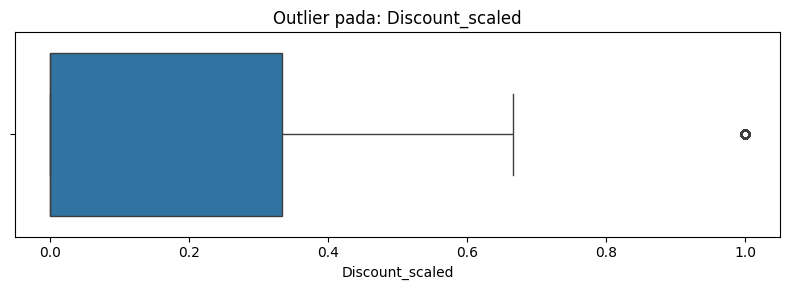

In [86]:
plt.figure(figsize=(12, 6))


data=db_baverage[['Discount_scaled']]

# Boxplot untuk masing-masing kolom secara terpisah
for col in data:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=db_baverage[col])
    plt.title(f'Outlier pada: {col}')
    plt.tight_layout()
    plt.show()



In [87]:
# 1. Encoding Customer_Type (B2C = 0, B2B = 1)
db_baverage['Customer_Type_Encoded'] = db_baverage['Customer_Type'].map({'B2C': 0, 'B2B': 1})

# 2. One-Hot Encoding untuk Category
category_encoded = pd.get_dummies(db_baverage['Category'], prefix='Category')

# Gabungkan ke dataset utama
db_baverage = pd.concat([db_baverage, category_encoded], axis=1)


In [88]:
db_baverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order_ID                      6986 non-null   object        
 1   Customer_ID                   6986 non-null   object        
 2   Customer_Type                 6986 non-null   object        
 3   Product                       6986 non-null   object        
 4   Category                      6986 non-null   object        
 5   Unit_Price                    6986 non-null   float64       
 6   Quantity                      6986 non-null   int64         
 7   Discount                      6986 non-null   float64       
 8   Total_Price                   6986 non-null   float64       
 9   Region                        6986 non-null   object        
 10  Order_Date                    6986 non-null   datetime64[ns]
 11  Discount_scaled               

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [89]:
cluster_features = ['Unit_Price', 'Total_Price', 'Quantity', 'Discount_scaled', 'Customer_Type_Encoded']
X = db_baverage[cluster_features]


In [90]:
X.head()

,Unit_Price,Total_Price,Quantity,Discount_scaled,Customer_Type_Encoded
0,3.12,24.96,8,0.666667,0
1,0.47,7.05,15,0.666667,0
2,1.54,10.78,7,0.333333,0
3,1.49,16.39,11,0.666667,0
4,0.53,5.30,10,0.666667,0


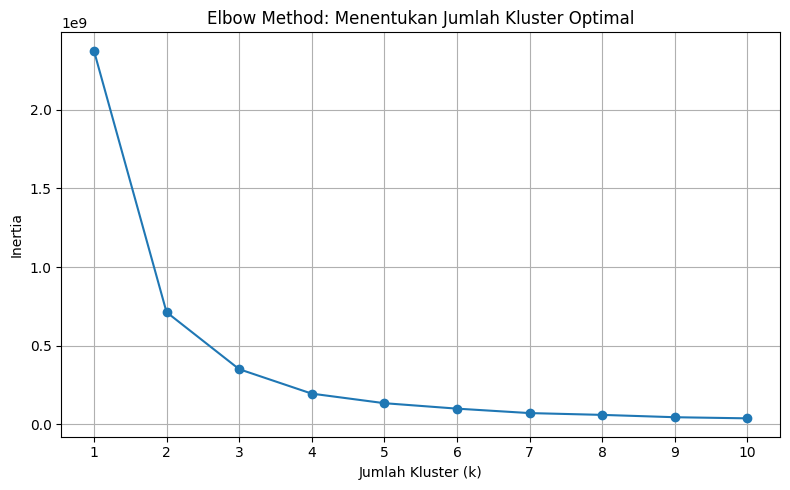

In [91]:
X = db_baverage[cluster_features]

# Hitung inertia untuk berbagai nilai k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Menentukan Jumlah Kluster Optimal')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
# Tentukan jumlah kluster optimal (misal k=3 setelah Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit KMeans ke data dan dapatkan hasil clustering
db_baverage['Cluster'] = kmeans.fit_predict(X)

# Cek distribusi kluster
print(db_baverage['Cluster'].value_counts())


Cluster
0    6798
2     154
1      34
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [93]:
X = db_baverage[cluster_features]

# Hitung Silhouette Score
sil_score = silhouette_score(X, db_baverage['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.9244


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [94]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

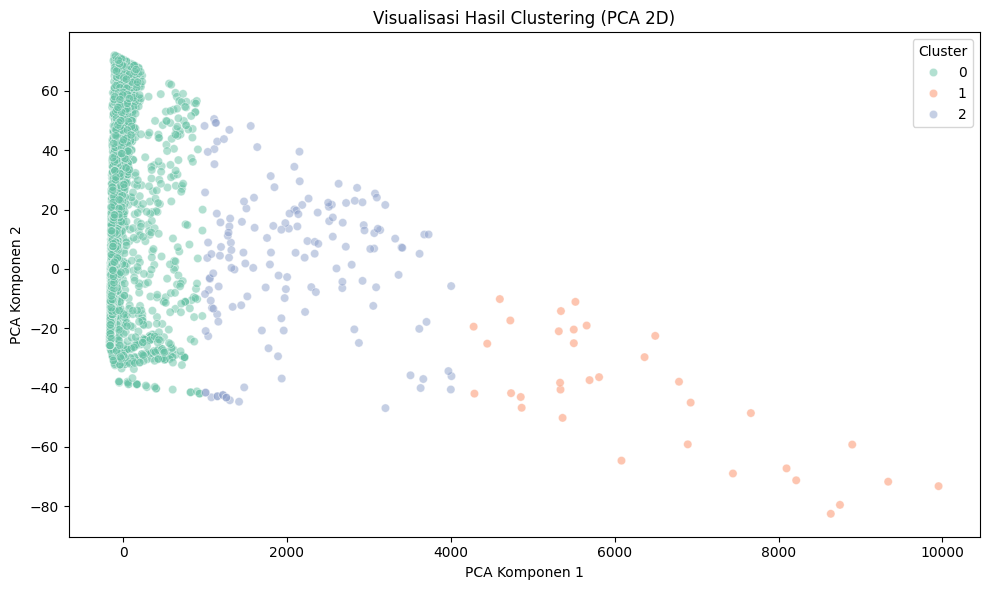

In [95]:
# Reduksi dimensi dengan PCA (ke 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Gabungkan hasil PCA dan kluster ke dataframe untuk visualisasi
df_plot = db_baverage.copy()
df_plot['PCA1'] = X_pca[:, 0]
df_plot['PCA2'] = X_pca[:, 1]

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.5)
plt.title('Visualisasi Hasil Clustering (PCA 2D)')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


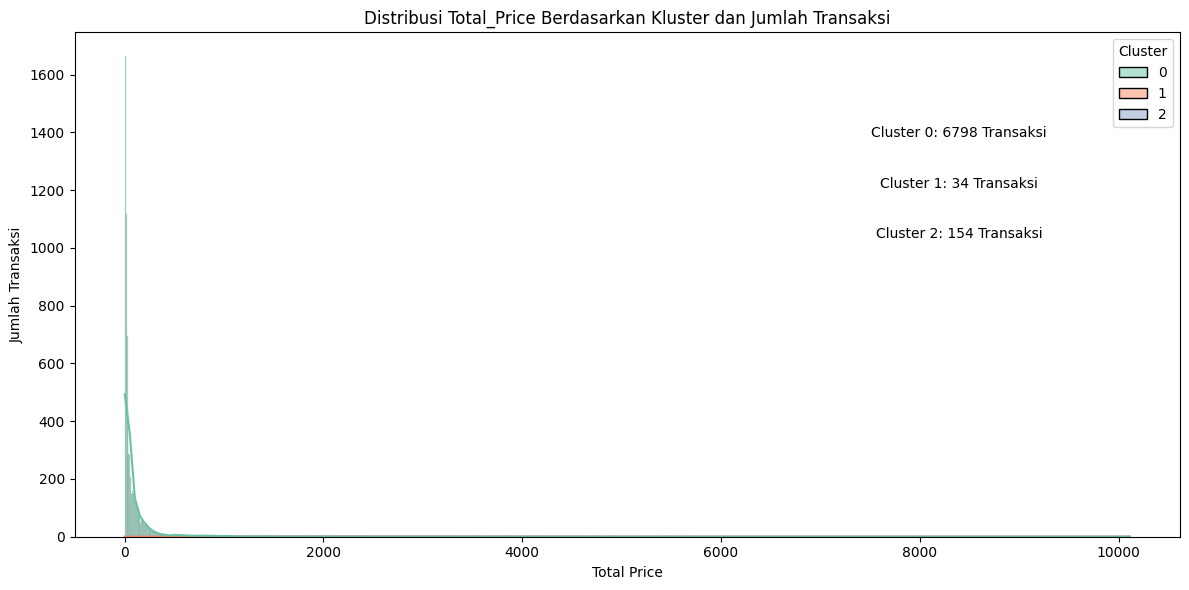

In [96]:
# Visualisasi distribusi Total_Price berdasarkan Kluster dan menampilkan jumlah
plt.figure(figsize=(12, 6))
sns.histplot(data=db_baverage, x='Total_Price', hue='Cluster', multiple='stack', kde=True, palette='Set2')

# Menambahkan informasi jumlah transaksi di setiap kluster ke dalam legenda
for i in range(3):  # Misalnya, kita punya 3 kluster
    count = db_baverage[db_baverage['Cluster'] == i].shape[0]
    plt.text(0.8, 0.8 - (i * 0.1), f'Cluster {i}: {count} Transaksi', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.title('Distribusi Total_Price Berdasarkan Kluster dan Jumlah Transaksi')
plt.xlabel('Total Price')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [97]:
# db_baverage['Region'] = LabelEncoder().inverse_transform(db_baverage['Region'])

In [98]:
db_baverage_normal = db_baverage.copy()

db_baverage_normal.drop(columns=['Category_Water', 'Category_Soft Drinks', 'Category_Juices', 'Category_Alcoholic Beverages', 'Customer_Type_Encoded', 'Discount_scaled'], inplace=True)


In [99]:
len (db_baverage_normal.columns)

12

In [100]:
db_baverage_normal.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1729,CUS9213,B2C,Mango Juice,Juices,3.12,8,0.0,24.96,Bayern,2021-10-29,0
1,ORD2517,CUS7837,B2C,Selters,Water,0.47,15,0.0,7.05,Nordrhein-Westfalen,2022-04-08,0
2,ORD2474,CUS5123,B2C,Krombacher,Alcoholic Beverages,1.54,7,0.0,10.78,Brandenburg,2021-09-02,0
3,ORD1760,CUS5852,B2C,Pepsi,Soft Drinks,1.49,11,0.0,16.39,Baden-Württemberg,2021-12-14,0
4,ORD62,CUS2179,B2C,Sprite,Soft Drinks,0.53,10,0.0,5.30,Berlin,2021-06-02,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [101]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [102]:

cluster_profiles = db_baverage.groupby('Cluster')[['Unit_Price', 'Total_Price', 'Quantity', 'Discount_scaled']].mean()
print(cluster_profiles)


         Unit_Price  Total_Price   Quantity  Discount_scaled
Cluster                                                     
0          4.220665    82.057954  28.497499         0.191821
1         92.105588  6445.266765  79.088235         0.245098
2         44.801299  2201.974026  63.201299         0.179654


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

Berikut adalah **analisis karakteristik** dari setiap kluster yang dihasilkan oleh model **KMeans** :

---

## **Cluster 0**:
- **Rata-rata `Unit_Price`:** 4.22
- **Rata-rata `Total_Price`:** 82.06
- **Rata-rata `Quantity`:** 28.50
- **Rata-rata `Discount`:** 0.19

### **Analisis**:
- **Cluster ini mewakili pelanggan dengan transaksi kecil.** Mereka membeli barang dengan harga unit yang rendah dan sering kali membeli dalam jumlah yang cukup banyak (jumlah kuantitas rata-rata 28.5).
- **Diskon yang diberikan relatif moderat** (19%), mungkin lebih kepada pelanggan yang membeli dalam jumlah besar tapi tidak dalam volume besar yang memberi diskon ekstrem.
- **Pelanggan di kluster ini** kemungkinan besar adalah **pembeli ritel** atau pembeli yang membeli produk dengan harga terjangkau dan memilih membeli dalam jumlah besar (mungkin produk dalam bentuk bundel atau grosir).

---

## **Cluster 1**:
- **Rata-rata `Unit_Price`:** 92.11
- **Rata-rata `Total_Price`:** 6445.27
- **Rata-rata `Quantity`:** 79.09
- **Rata-rata `Discount`:** 0.25

### **Analisis**:
- **Cluster ini mencerminkan pembeli dengan pembelian dalam jumlah besar.** Mereka membeli produk dengan harga unit yang jauh lebih tinggi dibandingkan kluster lain, dengan total transaksi yang jauh lebih besar, rata-rata mencapai lebih dari **€6,400**.
- **Pelanggan di kluster ini kemungkinan besar adalah pembeli grosir atau pelanggan B2B** yang membeli dalam volume besar dan mendapatkan diskon yang lebih besar (25%).
- Ini adalah **kluster dengan daya beli tinggi**, dengan harga total dan kuantitas yang sangat besar.

---

## **Cluster 2**:
- **Rata-rata `Unit_Price`:** 44.80
- **Rata-rata `Total_Price`:** 2201.97
- **Rata-rata `Quantity`:** 63.20
- **Rata-rata `Discount`:** 0.18

### **Analisis**:
- **Cluster ini memiliki pembeli dengan transaksi menengah**, dengan harga unit yang lebih tinggi dari kluster 0, namun lebih rendah dari kluster 1.
- **Pembeli di kluster ini melakukan pembelian dalam jumlah besar,** namun tidak sefrekuentasi kluster 1, dan mereka mendapatkan diskon yang sedikit lebih kecil (18%).
- **Pelanggan di kluster ini** bisa jadi adalah **pembeli yang lebih selektif**, memilih produk yang sedikit lebih mahal, namun tetap berusaha menjaga total pengeluaran.

---


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [103]:
db_baverage_normal.to_csv('Dataset_inisiasi.csv', index=False)